<a href="https://colab.research.google.com/github/christophersingh/Car-CNN-Capstone/blob/main/parking_spots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import json
from matplotlib.ticker import FormatStrFormatter
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! pip install -q kaggle
from google.colab import files 
#files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d daggysheep/find-a-car-park

!unzip find-a-car-park.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/Full/img_729160007.jpg  
  inflating: data/Full/img_729163006.jpg  
  inflating: data/Full/img_730080006.jpg  
  inflating: data/Full/img_730083006.jpg  
  inflating: data/Full/img_731170006.jpg  
  inflating: data/Full/img_731230006.jpg  
  inflating: data/Full/img_801010006.jpg  
  inflating: data/Full/img_801063006.jpg  
  inflating: data/Full/img_802063006.jpg  
  inflating: data/Full/img_802070006.jpg  
  inflating: data/Full/img_802073006.jpg  
  inflating: data/Full/img_802080006.jpg  
  inflating: data/Full/img_803043006.jpg  
  inflating: data/Full/img_803173006.jpg  
  inflating: data/Full/img_808171558.jpg  
  inflating: data/Full/img_808172159.jpg  
  inflating: data/Full/img_809023602.jpg  
  inflating: data/Full/img_809024602.jpg  
  inflating: data/Full/img_809025102.jpg  
  inflating: data/Full/img_809040602.jpg  
  inflating: data/Full/img_809042103.jpg  
  inflating: data/Full/img_809045603.jpg  
  i

In [97]:
from PIL import Image

def is_valid_jpg(filename):
  try:
    i=Image.open(filename)
    return i.format =='JPEG'
  except IOError:
    return False

def remove_corrapted_images_from_folder(cdir, verbose=False):
  total=0
  counter = 0
  for subdir, dirs, files in os.walk(cdir):
      for filename in files:
          filepath = subdir + os.sep + filename
          if filepath.endswith(".jpg") or filepath.endswith(".png"):
            total += 1
            if not is_valid_jpg(filepath):
              counter +=1
              os.remove(filepath)
              if (verbose):
                print(f"--Removed file ${filepath}")
  print(f"{counter} jpeg files removed out of {total} in folder {cdir}")

free_dir = "/content/data/data/Free"
full_dir = "/content/data/data/Full"

remove_corrapted_images_from_folder(free_dir) 
remove_corrapted_images_from_folder(full_dir)

0 jpeg files removed out of 1067 in folder /content/data/data/Free
0 jpeg files removed out of 2195 in folder /content/data/data/Full


In [98]:
len(free_dir)

23

In [99]:
X=[]
Z=[]
IMG_SIZE=128
FREE_DIR='/content/data/Free'
FULL_DIR='/content/data/Full'

In [100]:
def assign_label(img,label):
    return label

In [101]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,label)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [102]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical


from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [103]:
make_train_data('Free',FREE_DIR)

100%|██████████| 1067/1067 [00:33<00:00, 32.08it/s]


In [104]:
make_train_data('Full',FULL_DIR)

100%|██████████| 2195/2195 [01:10<00:00, 31.33it/s]


In [105]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
X=np.array(X)
X=X/255

In [106]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [107]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [108]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout,Conv2D, MaxPool2D, BatchNormalization, Activation
from keras.layers.core import Flatten, Dense, Dropout, Lambda


In [109]:
from keras.applications.resnet50 import ResNet50 



In [110]:
batch_size=128
epochs=50

# use callback only ReduceLROnPlateau
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=5,verbose=1,factor=0.1)

In [111]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1,
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True, 
        vertical_flip=False) 


datagen.fit(x_train)

In [137]:
from keras.applications.resnet50 import ResNet50 
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, AvgPool2D
from keras.layers.convolutional import Conv2D, MaxPooling2D



input_tensor_shape = (128,128,3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape= input_tensor_shape)
model2 = Sequential()
model2.add(base_model)
model2.add(AvgPool2D(name='globalaveragepooling2d'))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.5, name='dropout_1'))
model2.add(Conv2D(32, (3, 3),input_shape=(128, 128, 3),strides = (1,1),  padding = 'same', activation='relu'))
model2.add(BatchNormalization())
model2.add(AvgPool2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5, name='dropout_2'))
model2.add(Dense(2, activation='sigmoid',name='output_layer'))

model2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
globalaveragepooling2d (Aver (None, 2, 2, 2048)        0         
_________________________________________________________________
dense_9 (Dense)              (None, 2, 2, 1024)        2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 1024)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 32)          294944    
_________________________________________________________________
batch_normalization_7 (Batch (None, 2, 2, 32)          128       
_________________________________________________________________
average_pooling2d (AveragePo (None, 1, 1, 32)        

In [138]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, min_delta=0.01)
checkpoint_filepath = '/content/checkpoint/resnet50'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)


hist = model2.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 100, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/100
17/17 [==============================] - 10s 578ms/step - loss: 0.4256 - accuracy: 0.8376 - val_loss: 10.5039 - val_accuracy: 0.3483
Epoch 2/100
17/17 [==============================] - 9s 514ms/step - loss: 0.2007 - accuracy: 0.9271 - val_loss: 1.1444 - val_accuracy: 0.6517
Epoch 3/100
17/17 [==============================] - 9s 515ms/step - loss: 0.1048 - accuracy: 0.9638 - val_loss: 3.4387 - val_accuracy: 0.3483
Epoch 4/100
17/17 [==============================] - 9s 516ms/step - loss: 0.1045 - accuracy: 0.9661 - val_loss: 4.4300 - val_accuracy: 0.6517
Epoch 5/100
17/17 [==============================] - 9s 518ms/step - loss: 0.0754 - accuracy: 0.9777 - val_loss: 3.6068 - val_accuracy: 0.3483
Epoch 6/100
17/17 [==============================] - 9s 518ms/step - loss: 0.0710 - accuracy: 0.9791 - val_loss: 0.7059 - val_accuracy: 0.3483
Epoch 7/100
17/17 [==============================] - 9s 516ms/step - loss: 0.0626 - accuracy: 0.9838 - val_loss: 0.7437 - val_accuracy: 0.65

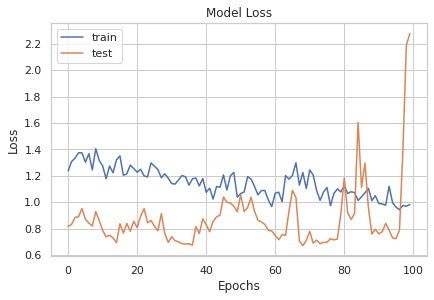

In [139]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

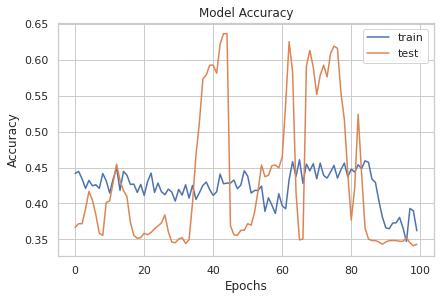

In [140]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [141]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [142]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==100):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==100):
        break

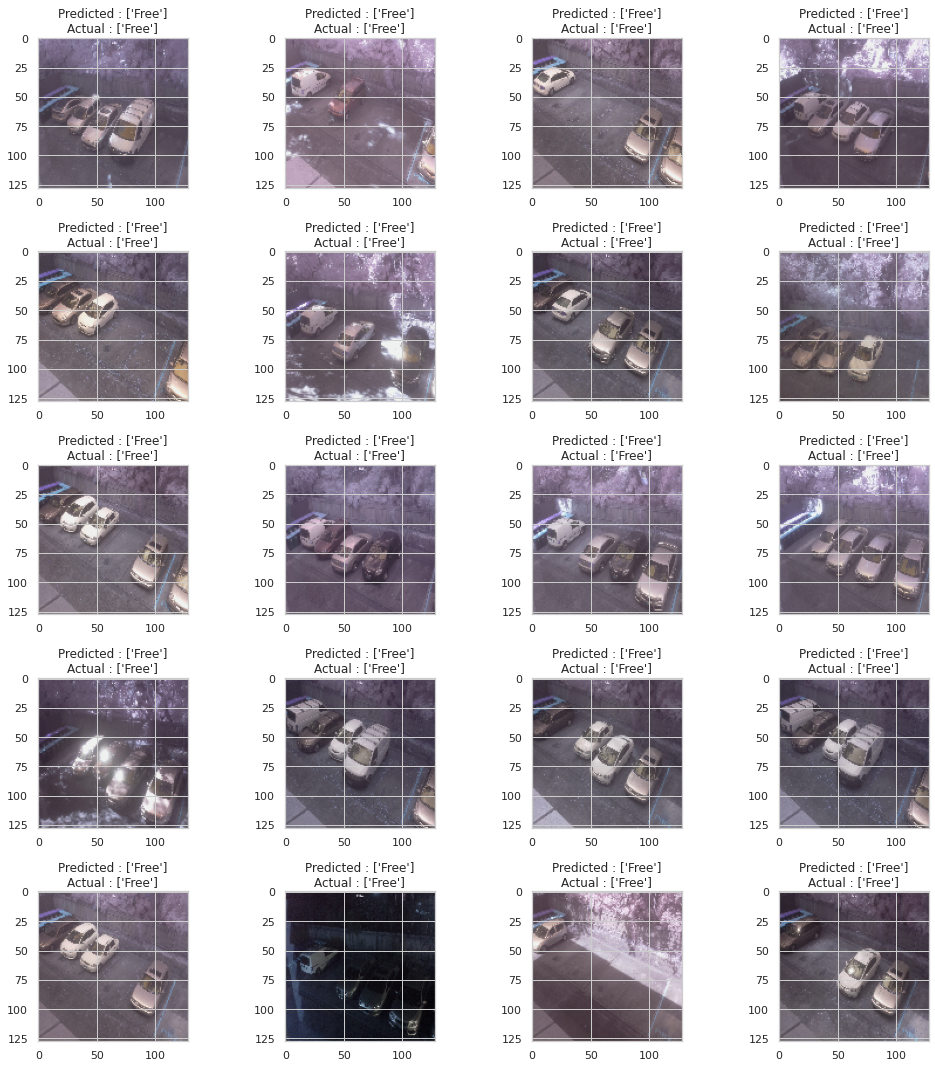

In [143]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(5,4)
fig.set_size_inches(15,15)
for i in range (5):
    for j in range (4):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual : "+str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

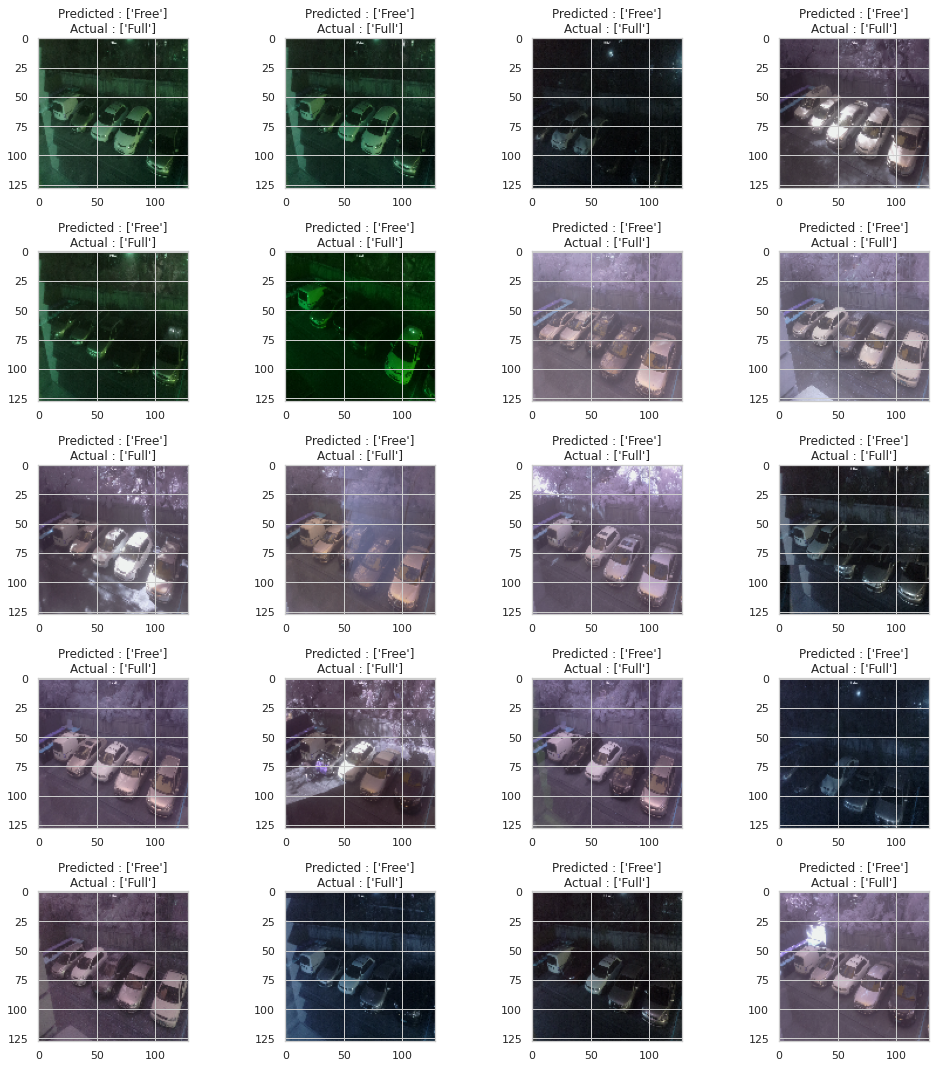

In [144]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(5,4)
fig.set_size_inches(15,15)
for i in range (5):
    for j in range (4):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual : "+str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1

In [146]:
(loss_score, accuracy_score) = model2.evaluate(x_test,y_test,verbose=0)
print('Loss score',loss_score)
print('Accuracy score',accuracy_score)

Loss score 0.025606540963053703
Accuracy score 0.99387127161026
